In [1]:
import sys
sys.path.insert(1, '../')
from OUvAAxelrod import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 1024
np.random.seed(seed)

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.00001]
I = [0.1, 0.00001]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)

In [3]:
check_parameters(agents, M, E, I)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 783 		 0.1 		 0.1 |
| 2837 		 0.1 		 0.1 |
| 3263 		 0.1 		 0.1 |
| 1708 		 0.1 		 0.1 |
| 3396 		 0.1 		 0.1 |
| 3575 		 0.1 		 0.1 |
| 2244 		 0.1 		 0.1 |
| 889 		 0.1 		 0.1 |
| 1841 		 0.1 		 0.1 |
| 102 		 0.1 		 0.1 |
| 3717 		 0.1 		 0.1 |
| 1398 		 0.1 		 0.1 |
| 5188 		 0.1 		 0.1 |
| 102 		 0.1 		 0.1 |
| 483 		 0.1 		 0.1 |
| 2028 		 0.1 		 0.1 |
| 542 		 0.1 		 0.1 |
| 7453 		 0.1 		 0.1 |
| 1604 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 1447.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 2243
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------
The population mean parameters entered were: 1000, 0.1, 0.1
The population s.d. parameters entered were: 2000, 1e-05, 1e-05
condition mean M unsatisfied
condition mean E satisfied
condition mean 

(array([18., 16., 24., 17., 11.,  7.,  3.,  3.,  0.,  1.]),
 array([ 102. ,  837.1, 1572.2, 2307.3, 3042.4, 3777.5, 4512.6, 5247.7,
        5982.8, 6717.9, 7453. ]),
 <a list of 10 Patch objects>)

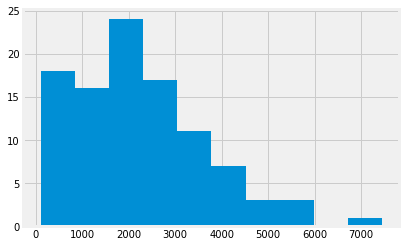

In [4]:
plt.hist([agent.m for agent in agents])

In [5]:
tournament_seed1024_mm1000_me01_mi01_sdm2000_sde0_sdi0 = Tournament.create_play_tournament(
                 countries = agents, 
                 max_rounds = 100000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 1,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )

Tournament has started...
Tournament has ended. The simulation took 145 minutes.


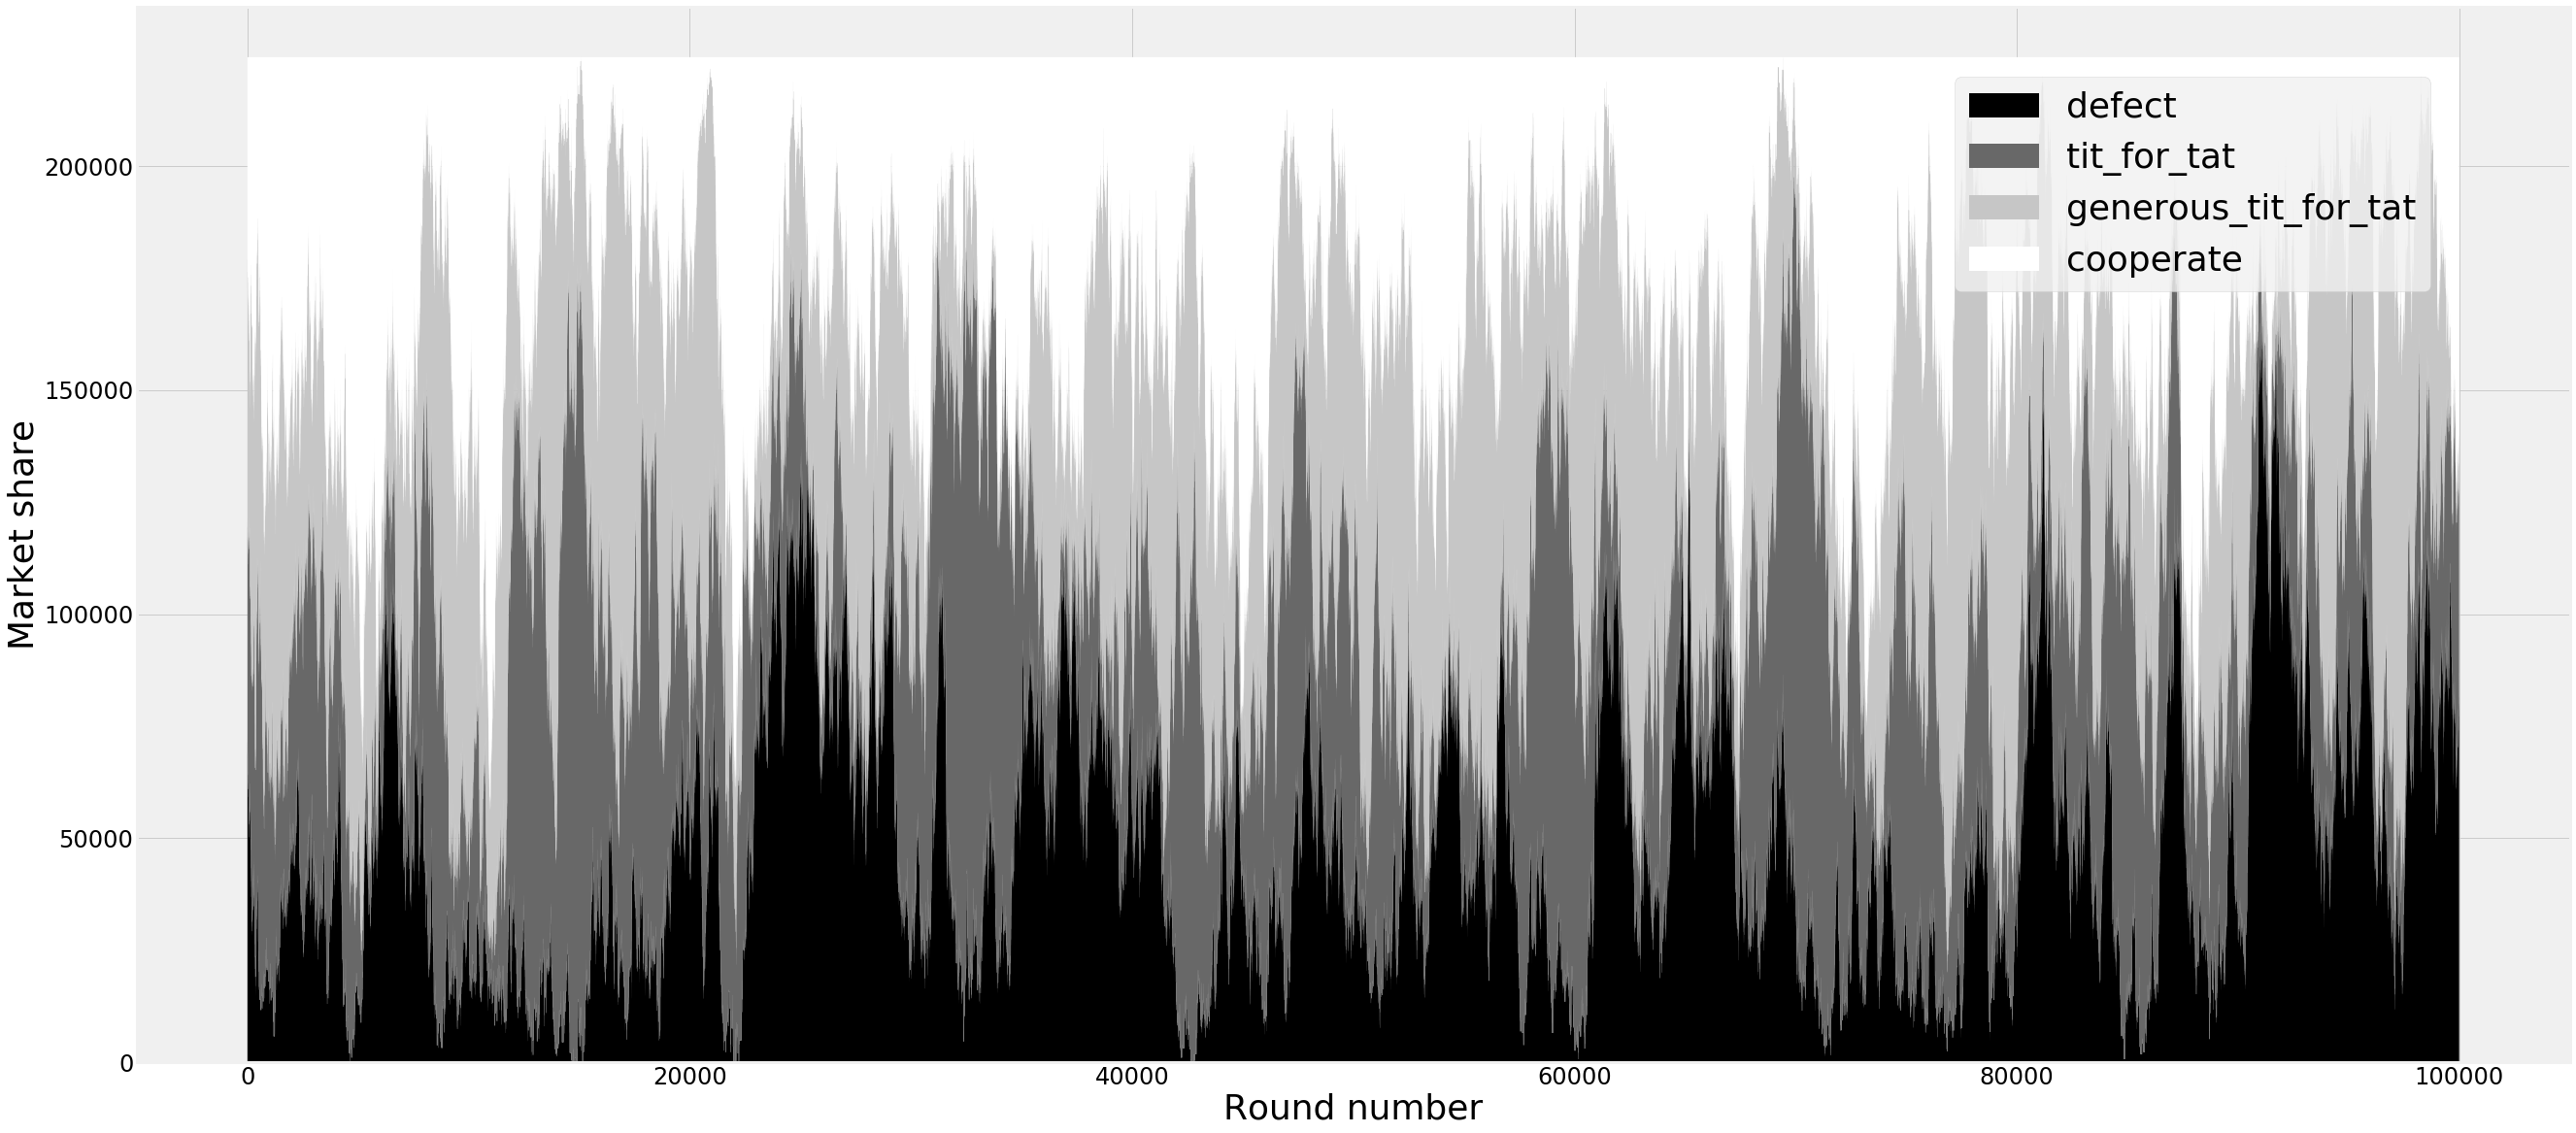

In [6]:
draw_stack(tournament_seed1024_mm1000_me01_mi01_sdm2000_sde0_sdi0)

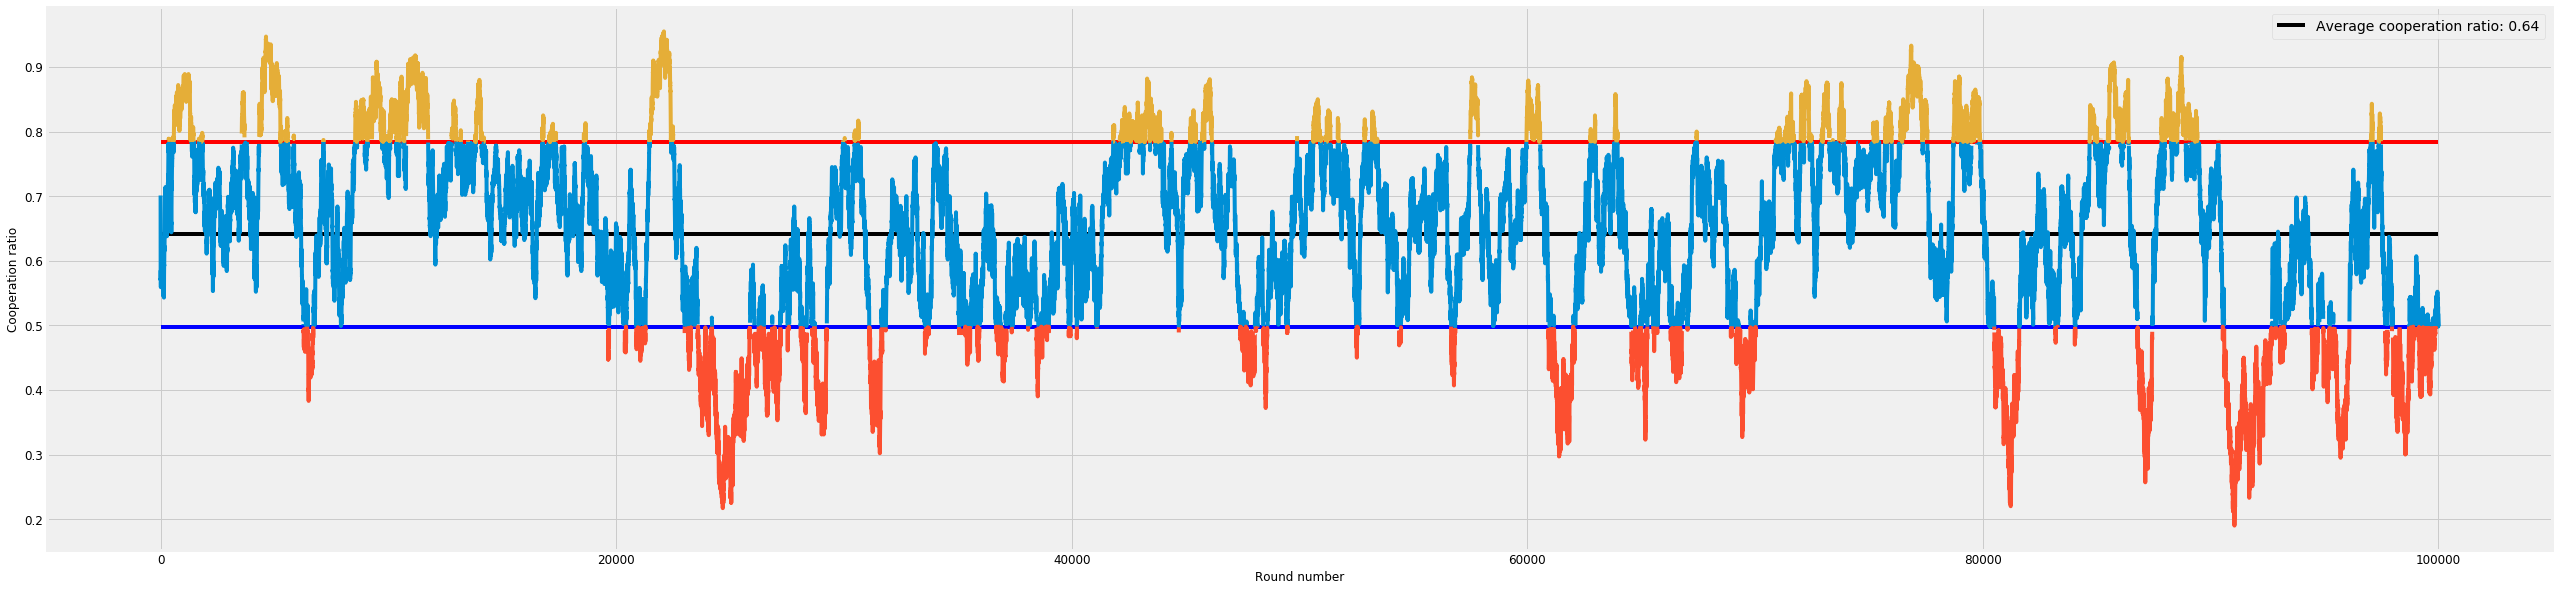

In [7]:
# we can change the constant of s.d.
C_D_ratios_per_round_var(tournament_seed1024_mm1000_me01_mi01_sdm2000_sde0_sdi0, constant = 1)

In [8]:
outliers = count_outliers(tournament_seed1024_mm1000_me01_mi01_sdm2000_sde0_sdi0, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_seed1024_mm1000_me01_mi01_sdm2000_sde0_sdi0_outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')

    S.D.  Counts
0    0.5    1006
1    0.6     991
2    0.7     941
3    0.8     864
4    0.9     808
5    1.0     689
6    1.1     612
7    1.2     598
8    1.3     556
9    1.4     433
10   1.5     383
11   1.6     318
12   1.7     254
13   1.8     228
14   1.9     182
15   2.0     138
16   2.1     144
17   2.2      77
18   2.3      55
19   2.4      49
20   2.5      39
21   2.6      30
22   2.7      19
23   2.8      30
24   2.9      10
25   3.0       2


In [10]:
save_cooperate_csv(tournament_seed1024_mm1000_me01_mi01_sdm2000_sde0_sdi0, type_of_tournament= "tournament_seed1024_mm1000_me01_mi01_sdm2000_sde0_sdi0", seed = str(seed))